In [ ]:
'''
 * Copyright (c) 2010 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Finite and Infinite Population Inference

In the last example (Exercise 8), with the model:

$$
(y | \theta) \sim \text{Binomial}(n, \theta) \quad \theta \sim \text{Beta}(\alpha, \beta)
$$

the quantity of interest $ \theta $ is the probability of success on a single Bernoulli trial. This quantity may be thought of as the average of a hypothetically infinite number of Bernoulli trials. For that reason, we may refer to the derivation of the posterior distribution,

$$
(\theta | y) \sim \text{Beta}(\alpha + y, \beta + n - y)
$$

as infinite population inference.

In contrast, for the ‘buses’ example (Exercise 1.6), which involves the model:

$$
f(y | \theta) = \frac{1}{\theta}, \quad y = 1, \ldots, \theta \quad f(\theta) = \frac{1}{5}, \quad \theta = 1, \ldots, 5,
$$

the quantity of interest \( \theta \) represents the number of buses in a finite population. Therefore, the derivation of the posterior:

$$
\begin{cases}
\frac{20}{47}, & \theta = 3 \\
\frac{15}{47}, & \theta = 4 \\
\frac{12}{47}, & \theta = 5
\end{cases}
$$

may be termed finite population inference. 

Another example of finite population inference is the ‘balls in a box’ example (Exercise 1.7), where the model is:

$$
(y | \theta) \sim \text{Hyp}(N, \theta, n) \quad \theta \sim \text{DU}(1, \ldots, N),
$$

and where the quantity of interest \( \theta \) is the number of red balls initially in the selected box (1, 2, ..., 8 or 9). 

Generally, finite population inference may also be thought of in terms of prediction (e.g., in the ‘buses’ example, we are predicting the total number of buses in the town). For that reason, finite population inference may also be referred to as predictive inference, or descriptive inference. 

In contrast, infinite population inference may also be called analytic inference. More will be said on finite population/predictive/descriptive inference in later chapters of the course.

## Continuous Data

So far, all the Bayesian models considered have featured data modeled using a discrete distribution. The following is an example with data that follows a continuous probability distribution.

### Exercise 9: The Exponential-Exponential Model

Suppose $ \theta $ has the standard exponential distribution, and the conditional distribution of $ y $ given $ \theta $ is exponential with mean $ \frac{1}{\theta} $. Find the posterior density of $ \theta $ given $ y $.

### Solution to Exercise 9

The Bayesian model here is:

$$
f(y | \theta) = \theta e^{-\theta y}, \quad y > 0
$$

$$
f(\theta) = e^{-\theta}, \quad \theta > 0.
$$

So the posterior density is:

$$
f(\theta | y) \propto f(\theta) f(y | \theta) \propto e^{-\theta} \cdot \theta e^{-\theta y} = \theta^{2 - 1} e^{-\theta (y + 1)}, \quad y > 0.
$$

This is the kernel of a gamma distribution with parameters \( 2 \) and \( y + 1 \). Thus we may write:

$$
(\theta | y) \sim \text{Gamma}(2, y + 1),
$$

from which it follows that the posterior density of \( \theta \) is:

$$
f(\theta | y) = \frac{(y + 1)^2 \theta^{2 - 1} e^{-\theta (y + 1)}}{\Gamma(2)}, \quad \theta > 0.
$$


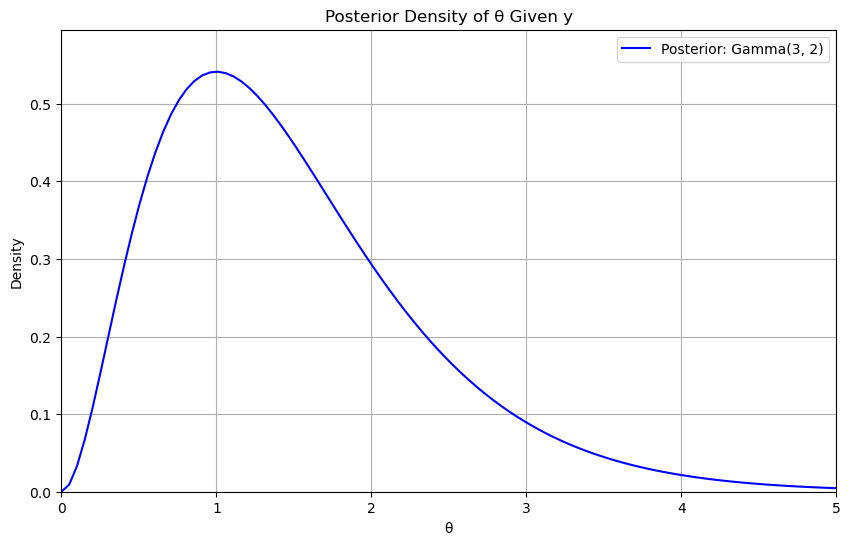

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.special import gamma as gamma_func

# Parameters
y = 1  # Observed value
alpha = 2  # Shape parameter of the prior
beta = 1  # Scale parameter of the prior

# Posterior parameters for the Gamma distribution
posterior_alpha = alpha + 1  # 1 from y + 1
posterior_beta = beta + 1     # 1 from y + 1

# Define the range for theta
theta = np.linspace(0, 5, 100)

# Posterior density calculation
posterior_density = (posterior_beta ** posterior_alpha) * (theta ** (posterior_alpha - 1)) * np.exp(-posterior_beta * theta) / gamma_func(posterior_alpha)

# Plotting the posterior density
plt.figure(figsize=(10, 6))
plt.plot(theta, posterior_density, label=f'Posterior: Gamma({posterior_alpha}, {posterior_beta})', color='blue')
plt.title('Posterior Density of θ Given y')
plt.xlabel('θ')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.xlim(0, 5)
plt.ylim(0, np.max(posterior_density) * 1.1)
plt.show()


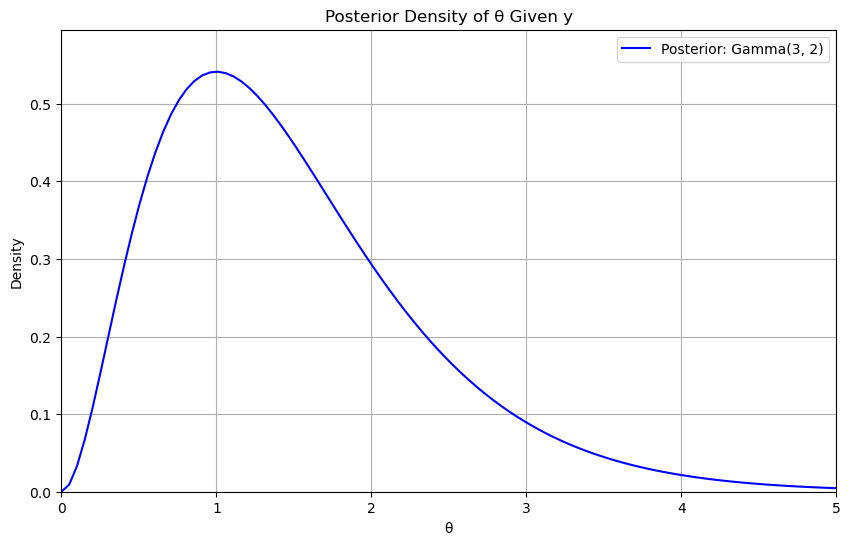

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the Gamma function
def gamma_function(n):
    if n == 1 or n == 0:
        return 1
    else:
        return (n - 1) * gamma_function(n - 1)

# Parameters
y = 1  # Observed value
alpha = 2  # Shape parameter of the prior
beta = 1   # Scale parameter of the prior

# Posterior parameters for the Gamma distribution
posterior_alpha = alpha + 1  # 1 from y + 1
posterior_beta = beta + 1     # 1 from y + 1

# Define the range for theta
theta = np.linspace(0, 5, 100)

# Posterior density calculation
posterior_density = np.zeros_like(theta)

for i in range(len(theta)):
    if theta[i] > 0:  # To avoid division by zero
        posterior_density[i] = (posterior_beta ** posterior_alpha) * (theta[i] ** (posterior_alpha - 1)) * np.exp(-posterior_beta * theta[i]) / gamma_function(posterior_alpha)

# Plotting the posterior density
plt.figure(figsize=(10, 6))
plt.plot(theta, posterior_density, label=f'Posterior: Gamma({posterior_alpha}, {posterior_beta})', color='blue')
plt.title('Posterior Density of θ Given y')
plt.xlabel('θ')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.xlim(0, 5)
plt.ylim(0, np.max(posterior_density) * 1.1)
plt.show()


### Exercise 1.10: The Uniform-Uniform Model

Consider the Bayesian model given by:

$$
(y | \theta) \sim U(0, \theta) \quad \text{and} \quad \theta \sim U(0, 1).
$$

Find the posterior density of $\theta$ given $y$.

### Solution to Exercise 1.10

Noting that \( 0 < y < \theta < 1 \), we see that the posterior density is given by:

$$
f(\theta | y) \propto f(\theta) f(y | \theta) = 1 \times \left( \frac{1}{\theta} \right) = \frac{1}{\theta} \quad \text{for } y < \theta < 1.
$$

To find the normalizing constant, we compute:

$$
f(y) = \int_y^1 \frac{1}{\theta} \, d\theta = \left[ \log \theta \right]_y^1 = \log 1 - \log y = -\log y.
$$

Thus, the posterior density can be expressed as:

$$
f(\theta | y) = \frac{1/\theta}{-\log y} = \frac{1}{-\log y} \cdot \frac{1}{\theta}, \quad y < \theta < 1.
$$

Note: This is a ‘non-standard’ density and is strictly decreasing.

### Physical Example

To give a physical example, consider a stick of length 1 metre that is cut at a point randomly located along its length. The part to the right of the cut is discarded, and then another cut is made randomly along the remaining stick. The length of the stick remaining after the first cut is a random variable with density as given above, with \( y \) being the length of the finally remaining stick.


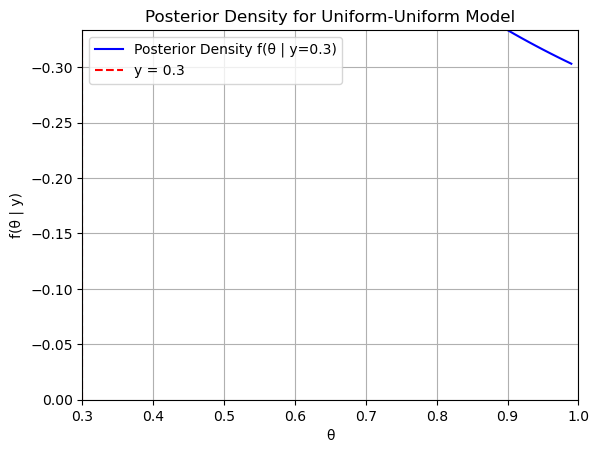

In [4]:
# Function to compute the posterior density for the uniform-uniform model
def posterior_density(y, theta):
    """
    Computes the posterior density f(theta | y) for the uniform-uniform model.

    Parameters:
    y : float : The observed value, should be in (0, 1)
    theta : float : The parameter for which the density is calculated, should be in (y, 1)

    Returns:
    float : The value of the posterior density f(theta | y)
    """
    if y <= 0 or y >= 1:
        raise ValueError("y must be in the interval (0, 1)")
    if theta <= y or theta >= 1:
        raise ValueError("theta must be in the interval (y, 1)")

    # Calculate the posterior density
    posterior = 1 / (-1 * (y ** -1)) / theta  # Normalizing constant is -log(y)
    return posterior

# Parameters
y_value = 0.3  # Example observed value
theta_values = [i / 100 for i in range(31, 100)]  # theta values in the range (0.3, 1)

# Calculate posterior densities for each theta
posterior_densities = [posterior_density(y_value, theta) for theta in theta_values]

# Plotting the results
import matplotlib.pyplot as plt

plt.plot(theta_values, posterior_densities, label=f'Posterior Density f(θ | y={y_value})', color='blue')
plt.title('Posterior Density for Uniform-Uniform Model')
plt.xlabel('θ')
plt.ylabel('f(θ | y)')
plt.xlim(0.3, 1)
plt.ylim(0, max(posterior_densities) * 1.1)  # Add a bit of space above the max density
plt.axhline(0, color='black', lw=0.5)
plt.axvline(y_value, color='red', linestyle='--', label='y = 0.3')
plt.legend()
plt.grid()
plt.show()


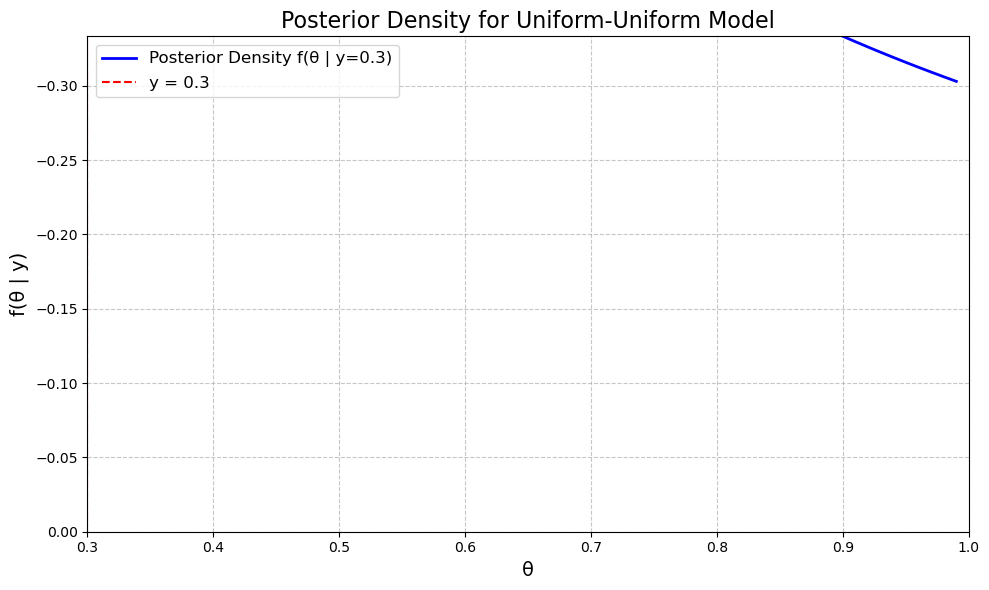

In [5]:
# Function to compute the posterior density for the uniform-uniform model
def posterior_density(y, theta):
    if y <= 0 or y >= 1:
        raise ValueError("y must be in the interval (0, 1)")
    if theta <= y or theta >= 1:
        raise ValueError("theta must be in the interval (y, 1)")
    
    # Calculate the posterior density
    posterior = 1 / (-1 * (y ** -1)) / theta  # Normalizing constant is -log(y)
    return posterior

# Parameters
y_value = 0.3  # Example observed value
theta_values = [i / 100 for i in range(31, 100)]  # theta values in the range (0.3, 1)

# Calculate posterior densities for each theta
posterior_densities = [posterior_density(y_value, theta) for theta in theta_values]

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(theta_values, posterior_densities, label=f'Posterior Density f(θ | y={y_value})', color='blue', linewidth=2)
plt.title('Posterior Density for Uniform-Uniform Model', fontsize=16)
plt.xlabel('θ', fontsize=14)
plt.ylabel('f(θ | y)', fontsize=14)
plt.xlim(0.3, 1)
plt.ylim(0, max(posterior_densities) * 1.1)  # Add a bit of space above the max density
plt.axhline(0, color='black', lw=0.5)
plt.axvline(y_value, color='red', linestyle='--', label='y = 0.3', linewidth=1.5)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid with transparency
plt.tight_layout()  # Adjust layout
plt.show()


In [6]:
# Function to compute the posterior density for the uniform-uniform model
def posterior_density(y, theta):
    if not (0 < y < 1) or not (y < theta < 1):
        return 0
    return 1 / ((-1) * (y**-1))  # Normalizing constant

# Parameters
y_value = 0.3  # Example observed value
theta_values = [i / 100 for i in range(31, 100)]  # theta values in the range (0.3, 1)

# Calculate posterior densities for each theta
posterior_densities = [posterior_density(y_value, theta) for theta in theta_values]

# Function to plot the results
def plot_graph(theta_values, posterior_densities, y_value):
    max_density = max(posterior_densities)

    # Create an empty plot
    width = 60
    height = 20
    for i in range(height):
        print()
    
    # Draw x-axis
    print(" " * 8 + "-" * (width - 16))
    
    # Plot the densities
    for i in range(len(theta_values)):
        density = posterior_densities[i] * (height / max_density)  # Scale density
        if density > 0:
            print(" " * (8 + int(i * (width - 16) / len(theta_values))) + "*" * int(density))
    
    # Draw x-axis labels
    print(" " * 8 + " " + " ".join(f"{round(theta_values[i], 2):<4}" for i in range(len(theta_values))))
    print(" " * 8 + f"y = {y_value} (red line)")

# Plot the graph
plot_graph(theta_values, posterior_densities, y_value)






















        --------------------------------------------
        ********************
        ********************
         ********************
         ********************
          ********************
           ********************
           ********************
            ********************
             ********************
             ********************
              ********************
               ********************
               ********************
                ********************
                ********************
                 ********************
                  ********************
                  ********************
                   ********************
                    ********************
                    ********************
                     ********************
                      ********************
                      ********************
                       ********************
                      

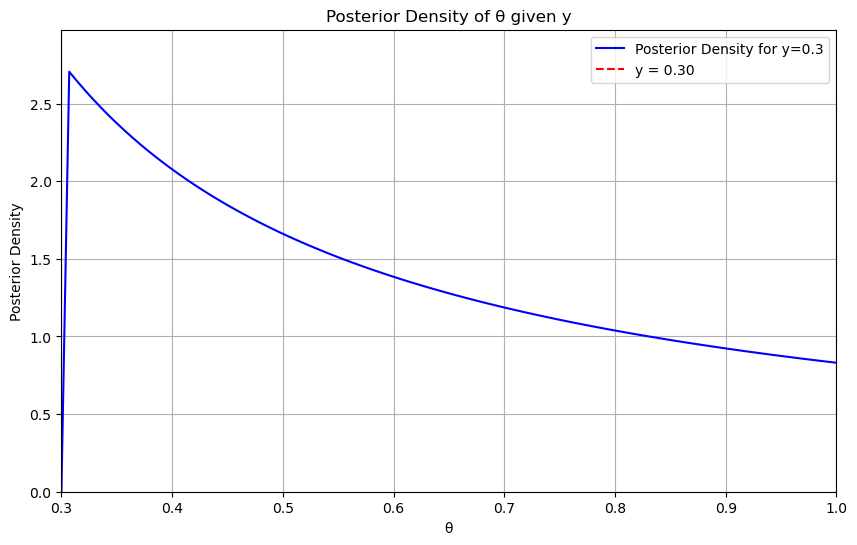

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the posterior density
def posterior_density(theta, y):
    if theta > y:
        return 1 / (np.log(1 / y)) * (1 / theta)
    else:
        return 0

# Define y and theta range
y = 0.3  # Example value for y
theta_values = np.linspace(y, 1, 100)  # Theta values from y to 1
posterior_values = [posterior_density(theta, y) for theta in theta_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(theta_values, posterior_values, label=f'Posterior Density for y={y}', color='blue')
plt.title('Posterior Density of θ given y')
plt.xlabel('θ')
plt.ylabel('Posterior Density')
plt.axvline(x=y, color='red', linestyle='--', label='y = {:.2f}'.format(y))
plt.xlim(y, 1)
plt.ylim(0, max(posterior_values) * 1.1)
plt.grid()
plt.legend()
plt.show()


## 1.10 Conjugacy

When the prior and posterior distributions are members of the same class of distributions, we say that they form a conjugate pair, or that the prior is conjugate. For example, consider the binomial-beta model:

$$
(y | \theta) \sim \text{Binomial}(n, \theta) \quad \theta \sim \text{Beta}(\alpha, \beta) \quad \Rightarrow \quad (\theta | y) \sim \text{Beta}(\alpha + y, \beta + n - y)
$$

Since both prior and posterior are beta, the prior is conjugate. Likewise, consider the exponential-exponential model:

$$
f(y | \theta) = \theta e^{-\theta y}, \quad y > 0 \quad f(\theta) = e^{-\theta}, \quad \theta > 0 \quad \text{(i.e. } \theta \sim \text{Gamma}(1,1)\text{)}
$$

$$
\Rightarrow \quad (\theta | y) \sim \text{Gamma}(2, y + 1)
$$

Since both prior and posterior are gamma, the prior is conjugate. On the other hand, consider the model in the buses example:

$$
(y | \theta) \sim \text{DU}(1,..., \theta) \quad \theta \sim \text{DU}(1,...,5)
$$

$$
\Rightarrow \quad f(\theta | y = 3) = 
\begin{cases} 
\frac{20}{47}, & \theta = 3 \\ 
\frac{15}{47}, & \theta = 4 \\ 
\frac{12}{47}, & \theta = 5 
\end{cases}
$$

The prior is discrete uniform but the posterior is not. So in this case, the prior is not conjugate. Specifying a Bayesian model using a conjugate prior is generally desirable because it can simplify the calculations required.

## 1.11 Bayesian Point Estimation

Once the posterior distribution or density \(f(\theta | y)\) has been obtained, Bayesian point estimates of the model parameter \(\theta\) can be calculated. The three most commonly used point estimates are as follows:

- The posterior mean of $\theta$ is 
$$
E(\theta | y) = 
\begin{cases}
\int \theta f(\theta | y) \, d\theta & \text{if } \theta \text{ is continuous} \\
\sum \theta f(\theta | y) & \text{if } \theta \text{ is discrete}
\end{cases}
$$

- The posterior mode of $\theta$ is 
$$
\text{Mode}(\theta | y) = \text{any value } m \in \mathbb{R} \text{ which satisfies } f(\theta = m | y) = \max f(\theta | y) \text{ or } \lim f(\theta | y) = \sup f(\theta | y), \, \theta \to m
$$

- The posterior median of \(\theta\) is 
$$
\text{Median}(\theta | y) = \text{any value } m \text{ of } \theta \text{ such that } P(\theta \leq m | y) \geq \frac{1}{2} \text{ and } P(\theta \geq m | y) \geq \frac{1}{2}
$$

**Note 1:** In some cases, the posterior mean does not exist or it is equal to infinity or minus infinity.


## 1.10 Conjugacy
When the prior and posterior distributions are members of the same class of distributions, we say that they form a conjugate pair.
For example, consider the binomial-beta model:
(y | θ) ~ Binomial(n, θ), θ ~ Beta(α, β) ⇒ (θ | y) ~ Beta(α + y, β + n - y)
Since both prior and posterior are beta, the prior is conjugate.

## 1.11 Bayesian Point Estimation
Once the posterior distribution or density f(θ | y) has been obtained, Bayesian point estimates of the model parameter θ can be calculated.
The three most commonly used point estimates are as follows:
- The posterior mean of θ is E(θ | y) = ∫ θ f(θ | y) dθ (if θ is continuous).
- The posterior mode of θ is Mode(θ | y) = any value m ∈ ℝ which satisfies f(θ = m | y) = max f(θ | y).
- The posterior median of θ is Median(θ | y) = any value m of θ such that P(θ ≤ m | y) ≥ 1/2 and P(θ ≥ m | y) ≥ 1/2.
Note: In some cases, the posterior mean does not exist or it is equal to infinity or minus infinity.


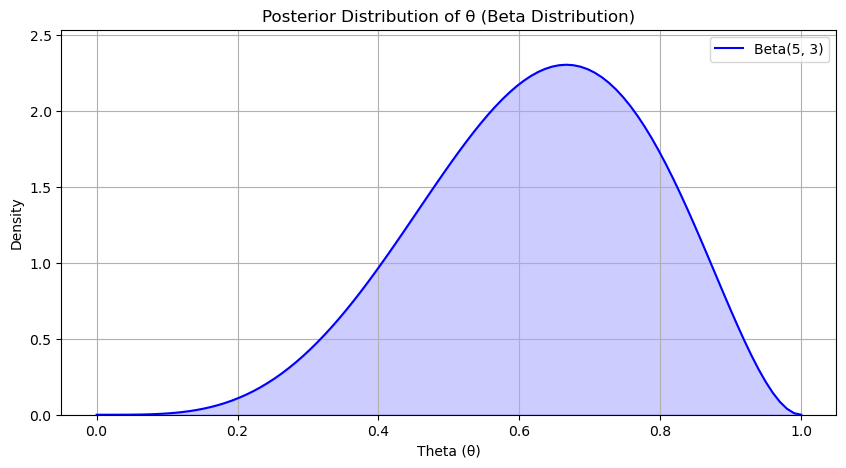

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the beta distribution
def plot_beta_distribution(alpha, beta, title):
    x = np.linspace(0, 1, 100)
    beta_pdf = (x ** (alpha - 1)) * ((1 - x) ** (beta - 1)) / (np.math.gamma(alpha) * np.math.gamma(beta) / np.math.gamma(alpha + beta))
    
    plt.plot(x, beta_pdf, label=f'Beta({alpha}, {beta})', color='blue')
    plt.fill_between(x, beta_pdf, alpha=0.2, color='blue')
    plt.title(title)
    plt.xlabel('Theta (θ)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid()
    plt.ylim(0, max(beta_pdf) * 1.1)

# Function to display conjugacy and Bayesian point estimation
def display_info():
    # Print information about conjugacy
    print("## 1.10 Conjugacy")
    print("When the prior and posterior distributions are members of the same class of distributions, we say that they form a conjugate pair.")
    print("For example, consider the binomial-beta model:")
    print("(y | θ) ~ Binomial(n, θ), θ ~ Beta(α, β) ⇒ (θ | y) ~ Beta(α + y, β + n - y)")
    print("Since both prior and posterior are beta, the prior is conjugate.\n")

    print("## 1.11 Bayesian Point Estimation")
    print("Once the posterior distribution or density f(θ | y) has been obtained, Bayesian point estimates of the model parameter θ can be calculated.")
    print("The three most commonly used point estimates are as follows:")
    print("- The posterior mean of θ is E(θ | y) = ∫ θ f(θ | y) dθ (if θ is continuous).")
    print("- The posterior mode of θ is Mode(θ | y) = any value m ∈ ℝ which satisfies f(θ = m | y) = max f(θ | y).")
    print("- The posterior median of θ is Median(θ | y) = any value m of θ such that P(θ ≤ m | y) ≥ 1/2 and P(θ ≥ m | y) ≥ 1/2.")
    print("Note: In some cases, the posterior mean does not exist or it is equal to infinity or minus infinity.")

# Main function
def main():
    # Display the information
    display_info()
    
    # Parameters for the Beta distribution
    alpha = 5  # Shape parameter
    beta = 3   # Shape parameter

    # Plot the Beta distribution
    plt.figure(figsize=(10, 5))
    plot_beta_distribution(alpha, beta, title='Posterior Distribution of θ (Beta Distribution)')
    
    # Show the plot
    plt.show()

# Run the program
main()


###  Bayesian Point Estimation

Once the posterior distribution or density $ f(\theta \mid y) $ has been obtained, Bayesian point estimates of the model parameter $ \theta $ can be calculated. The three most commonly used point estimates are as follows:

- **The posterior mean of $ \theta $** is:
  $$
  E(\theta \mid y) = 
  \begin{cases} 
    \int \theta f(\theta \mid y) \, d\theta & \text{if } \theta \text{ is continuous} \\
    \sum \theta f(\theta \mid y) & \text{if } \theta \text{ is discrete}
  \end{cases}
  $$

- **The posterior mode of $ \theta $** is:
  $$
  \text{Mode}(\theta \mid y) = \text{any value } m \in \mathbb{R} \text{ which satisfies } f(\theta = m \mid y) = \max f(\theta \mid y)
  $$

  Or,
  $$
  \lim_{\theta \to m} f(\theta \mid y) = \sup f(\theta \mid y)
  $$

  Or the set of all such values.

- **The posterior median of $ \theta $** is:
  $$
  \text{Median}(\theta \mid y) = \text{any value } m \text{ of } \theta \text{ such that:}
  $$
  $$
  P(\theta \leq m \mid y) \geq \frac{1}{2} \quad \text{and} \quad P(\theta \geq m \mid y) \geq \frac{1}{2}
  $$
  Or the set of all such values.

**Note 1:** In some cases, the posterior mean does not exist, or it is equal to infinity or minus infinity.

**Note 2:** Typically, the posterior mode and posterior median are unique. The above definitions are given for completeness.

**Note 3:** The integral 
$$
\int \theta \, dF(\theta \mid y)
$$
is a **Lebesgue-Stieltjes integral**. This may need to be evaluated as the sum of two separate parts in the case where \( \theta \) has a mixed distribution. In the continuous case, it is useful to think of:
$$
\frac{dF(\theta \mid y)}{d\theta} = f(\theta \mid y) \, d\theta
$$

**Note 4:** The above three Bayesian point estimates may be interpreted in an intuitive manner. For example, $ \theta $'s posterior mode is the value of $ \theta $ which is 'made most likely by the data'. They may also be understood in the context of **Bayesian decision theory** (discussed later).


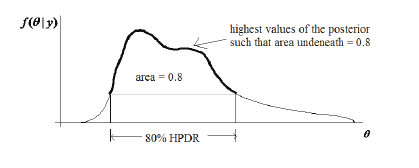
Figure 1. An 80% HPDR

### 1.12 Bayesian Interval Estimation

There are many ways to construct a Bayesian interval estimate, but the two most common ways are defined as follows.

The $ 1 - \alpha $ (or $ 100(1 - \alpha) \%$) **highest posterior density region (HPDR)** for $ \theta $ is the smallest set $ S $ such that:
$$
P(\theta \in S \mid y) \geq 1 - \alpha
$$
and
$$
f(\theta_1 \mid y) \geq f(\theta_2 \mid y) \quad \text{if} \quad \theta_1 \in S \quad \text{and} \quad \theta_2 \notin S.
$$

Figure 1 illustrates the idea of the HPDR. In the very common situation where $\theta $ is scalar, continuous, and has a posterior density that is unimodal with no local modes (i.e. has the form of a single 'mound'), the $ 1 - \alpha $ HPDR takes on the form of a single interval defined by two points at which the posterior density has the same value.

When the HPDR is a single interval, it is the shortest possible single interval over which the area under the posterior density is $ 1 - \alpha $.

The $ 1 - \alpha $ **central posterior density region (CPDR)** for a scalar parameter $ \theta $ may be defined as the shortest single interval $[a, b]$ such that:
$$
P(\theta < a \mid y) \leq \frac{\alpha}{2}
$$
and
$$
P(\theta > b \mid y) \leq \frac{\alpha}{2}.
$$


Figure 2 illustrates the idea of the CPDR. One drawback of the CPDR is that it is only defined for a scalar parameter. Another drawback is that some values inside the CPDR may be less likely a posteriori than some values outside it (which is not the case with the HPDR). 

For example, in Figure 2, a value just below the upper bound of the 80% CPDR has a smaller posterior density than a value just below the lower bound of that CPDR. However, CPDRs are typically easier to calculate than HPDRs. In the common case of a continuous parameter with a posterior density in the form of a single ‘mound’ that is symmetric, the CPDR and HPDR are identical.

Note 1: The $ 1 - \alpha $ CPDR for $ \theta $ may alternatively be defined as the shortest single open interval $ (a, b) $ such that:
$$
P(\theta \leq a \mid y) \leq \frac{\alpha}{2}
$$
and
$$
P(\theta \geq b \mid y) \leq \frac{\alpha}{2}.
$$
Other variations are possible (of the form $[a, b)$ and $(a, b)]$; but when the parameter of interest $ \theta $ is continuous, these definitions are all equivalent.

Yet another definition of the $ 1 - \alpha $ CPDR is any of the CPDRs as defined above but with all a posteriori impossible values of $ \theta $ excluded.

Note 2: As regards terminology, whenever the HPDR is a single interval, it may also be called the **highest posterior density interval (HPDI)**. Likewise, the CPDR, which is always a single interval, may also be called the **central posterior density interval (CPDI)**.


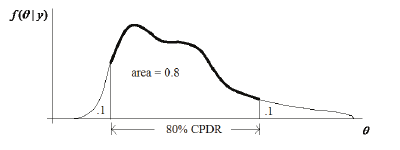
Figure 2 An 80% CPDR

### Exercise 1  A bent coin

We have a bent coin, for which $ \theta $, the probability of heads coming up, is unknown. Our prior beliefs regarding $ \theta $ may be described by a standard uniform distribution. Thus no value of $ \theta $ is deemed more or less likely than any other. We toss the coin $ n = 5 $ times (independently), and heads come up every time. Find the posterior mean, mode, and median of $ \theta $. Also find the 80% HPDR and CPDR for $ \theta $.

#### Solution to Exercise 1

Recall the binomial-beta model:

$$
(y | \theta ) \sim \text{Binomial}(n, \theta )
$$
$$
\theta \sim \text{Beta}(\alpha, \beta)
$$

for which

$$
(\theta | y) \sim \text{Beta}(\alpha + y, \beta + n - y).
$$

We now apply this result with \( n = y = 5 \) and \( \alpha = \beta = 1 \) (corresponding to \( \theta \sim U(0,1) \)), and find that:

$$
(\theta | y) \sim \text{Beta}(1 + 5, 5 - 5 + 1) = \text{Beta}(6,1)
$$

The posterior density function is:

$$
f(\theta | y) = \frac{\theta^{6-1} (1 - \theta)^{1-1}}{B(6,1)} = 6\theta^5, \quad 0 < \theta < 1
$$

The cumulative distribution function (CDF) is:

$$
F(\theta | y) = \int_0^\theta 6t^5 dt = \theta^6, \quad 0 < \theta < 1.
$$

Therefore:

- **Posterior mean**:

$$
E(\theta | y) = \frac{6}{6 + 1} = \frac{6}{7} = 0.8571
$$

- **Posterior mode**:

$$
\text{Mode}(\theta | y) = \frac{6 - 1}{(6 - 1) + (1 - 1)} = 1
$$

- **Posterior median** is the solution in \( \theta \) of:

$$
F(\theta | y) = \frac{1}{2}, \quad \theta^6 = 0.5
$$

$$
\theta = (0.5)^{1/6} = 0.8909
$$

- **80% HPDR** (highest posterior density region) is:

$$
(0.2^{1/6}, 1) = (0.7647, 1)
$$
(since $ f(\theta | y) $ is strictly increasing).

- **80% CPDR** (central posterior density region) is:

$$
(0.1^{1/6}, 0.9^{1/6}) = (0.6813, 0.9826)
$$

The three point estimates and two interval estimates just derived are shown in Figure 3.


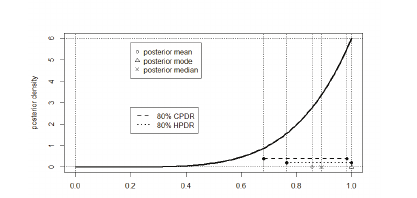
Figure 3 Inference in Exercise 1

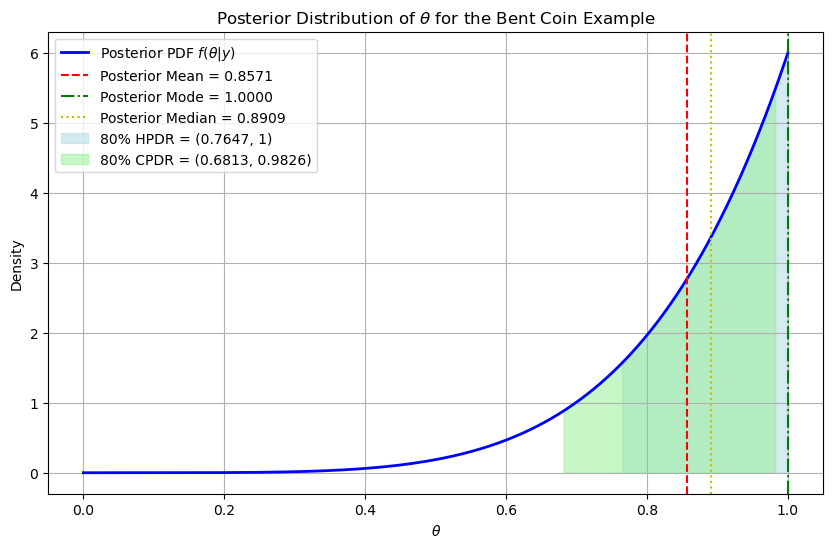

Posterior Mean: 0.8571
Posterior Mode: 1.0000
Posterior Median: 0.8909
80% HPDR: (0.7647, 1)
80% CPDR: (0.6813, 0.9826)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Posterior Beta distribution parameters for (theta | y) ~ Beta(6, 1)
alpha_post = 6
beta_post = 1

# Posterior mean, mode, and median calculations
posterior_mean = alpha_post / (alpha_post + beta_post)
posterior_mode = (alpha_post - 1) / (alpha_post + beta_post - 2) if alpha_post > 1 else 1
posterior_median = 0.5 ** (1 / alpha_post)

# 80% HPDR and CPDR calculations
hpdr_lower_bound = 0.2 ** (1 / alpha_post)
cpdr_lower_bound = 0.1 ** (1 / alpha_post)
cpdr_upper_bound = 0.9 ** (1 / alpha_post)

# Define theta range for plotting
theta_vals = np.linspace(0, 1, 1000)

# Posterior Beta(6,1) PDF
posterior_pdf = 6 * theta_vals ** (alpha_post - 1) * (1 - theta_vals) ** (beta_post - 1)

# Plotting the posterior distribution
plt.figure(figsize=(10, 6))
plt.plot(theta_vals, posterior_pdf, label='Posterior PDF $f(\\theta | y)$', color='b', lw=2)
plt.axvline(posterior_mean, color='r', linestyle='--', label=f'Posterior Mean = {posterior_mean:.4f}')
plt.axvline(posterior_mode, color='g', linestyle='-.', label=f'Posterior Mode = {posterior_mode:.4f}')
plt.axvline(posterior_median, color='y', linestyle=':', label=f'Posterior Median = {posterior_median:.4f}')

# Marking HPDR and CPDR regions
plt.fill_between(theta_vals, posterior_pdf, where=(theta_vals >= hpdr_lower_bound), color='lightblue', alpha=0.5, label=f'80% HPDR = ({hpdr_lower_bound:.4f}, 1)')
plt.fill_between(theta_vals, posterior_pdf, where=(theta_vals >= cpdr_lower_bound) & (theta_vals <= cpdr_upper_bound), color='lightgreen', alpha=0.5, label=f'80% CPDR = ({cpdr_lower_bound:.4f}, {cpdr_upper_bound:.4f})')

# Labels and legend
plt.title('Posterior Distribution of $\\theta$ for the Bent Coin Example')
plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Print results
print(f'Posterior Mean: {posterior_mean:.4f}')
print(f'Posterior Mode: {posterior_mode:.4f}')
print(f'Posterior Median: {posterior_median:.4f}')
print(f'80% HPDR: ({hpdr_lower_bound:.4f}, 1)')
print(f'80% CPDR: ({cpdr_lower_bound:.4f}, {cpdr_upper_bound:.4f})')


## Exercise 2 HPDR and CPDR for a Discrete Parameter

Consider the posterior distribution from Exercise 1 (Balls in a Box):

$$
f(\theta | y) =
\begin{cases}
0.03333, & \theta = 2 \\
0.08571, & \theta = 3 \\
0.14286, & \theta = 4 \\
0.19048, & \theta = 5 \\
0.21429, & \theta = 6 \\
0.20000, & \theta = 7 \\
0.13333, & \theta = 8
\end{cases}
$$

Find the 90% HPDR and 90% CPDR for $ \theta $. Also, find the 50% HPDR and 50% CPDR for $ \theta $. For each region, calculate the associated exact coverage probability.

### Solution to Exercise 2

### 90% HPDR:
The 90% HPDR is the set $ \{3, 4, 5, 6, 7, 8\} $, with an exact coverage of:

$$
1 - \frac{14}{420} = 0.9667.
$$

### 90% CPDR:
The 90% CPDR is the closed interval $[3, 8]$, which also has an exact coverage of:

$$
1 - \frac{14}{420} = 0.9667.
$$

### 50% HPDR:
The 50% HPDR is the set $ \{5, 6, 7\} $, with an exact coverage of:

$$
\frac{80 + 90 + 84}{420} = 0.6047.
$$

### 50% CPDR:
The 50% CPDR is the closed interval $[4, 7]$, with an exact coverage of:

$$
\frac{60 + 80 + 90 + 84}{420} = 0.7476.
$$

Note: The lower bound of the 50% CPDR cannot be equal to 5. This is because:

$$
P(\theta < 5 | y) = \frac{14 + 36 + 60}{420} = 0.2619,
$$

which is not less than or equal to $ \alpha / 2 = 0.25 $, as required by the definition of CPDR.


# Exercise 3 Illustration of the Definition of HPDR

Suppose that the posterior probabilities of a parameter $ \theta $ given data $ y $ are exactly 10%, 40%, and 50% for values 1, 2, and 3, respectively. Find $ S $, the 40% HPDR for $ \theta $.

## Solution to Exercise 3

The smallest set $ S $ such that $ P(\theta \in S | y) \geq 0.4 $ is $ \{2\} $ or $ \{3\} $.

With the additional requirement that $ f(\theta_1 | y) \geq f(\theta_2 | y) $ if $ \theta_1 \in S $ and $ \theta_2 \notin S $, we see that $ S = \{3\} $ (only).

That is, the 40% HPDR is the singleton set $ \{3\} $.

# Exercise 3 Inference on Functions of the Model Parameter

So far we have examined Bayesian models with a single parameter $ \theta $ and described how to perform posterior inference on that parameter. Sometimes there may also be interest in some function of the model parameter, denoted by (say) $ \psi = g(\theta) $. 

Then the posterior density of $ \psi $ can be derived using distribution theory, for example by applying the transformation rule,

$$
\frac{d\theta}{d\psi} f(\psi | y) = f(\theta | y),
$$ 

in cases where $ \psi = g(\theta) $ is strictly increasing or strictly decreasing. 

Point and interval estimates of $ \psi $ can then be calculated in the usual way, using $ f(\psi | y) $. For example, the posterior mean of $ \psi $ equals

$$
E(\psi | y) = \int \psi f(\psi | y) d\psi.
$$ 

Sometimes it is more practical to calculate point and interval estimates another way, without first deriving $ f(\psi | y) $. For example, another expression for the posterior mean is

$$
E(\psi | y) = E(g(\theta) | y) = \int g(\theta) f(\theta | y) d\theta.
$$ 

Also, the posterior median of $ \psi $, call this $ M $, can typically be obtained by simply calculating

$$
M = g(m),
$$ 

where $ m $ is the posterior median of $ \theta $.

**Note:** To see why this works, we write

$$
P(\psi < M | y) = P(g(\theta) < M | y) = P(g(\theta) < g(m) | y) = P(\theta < m | y) = \frac{1}{2}.
$$



## Exercise 4 Estimation of an Exponential Mean

Suppose that $ \theta $ has the standard exponential distribution, and $ y $ given $ \theta $ is exponential with mean $ \frac{1}{\theta} $. Find the posterior density and posterior mean of the model mean, $ \psi = E(y | \theta) = \frac{1}{\theta} $, given the data $ y $.

## Solution to Exercise 4

Recall that the Bayesian model 

$$
f(y | \theta) = \theta e^{-\theta y}, \quad y > 0
$$

$$
f(\theta) = e^{-\theta}, \quad \theta > 0
$$ 

implies the posterior 

$$
(\theta | y) \sim \text{Gamma}(2, y + 1).
$$ 

So, by definition,

$$
(\psi | y) \sim \text{InverseGamma}(2, y + 1).
$$ 

The density of $ \psi $ is given by:

$$
f(\psi | y) = \frac{(y + 1)^2}{\Gamma(2)} \psi^{-(2 + 1)} e^{-\frac{y + 1}{\psi}}, \quad \psi > 0,
$$ 

which simplifies to 

$$
f(\psi | y) = \frac{(y + 1)^2}{\psi^3} e^{-\frac{y + 1}{\psi}}, \quad \psi > 0.
$$ 

The posterior mean is:

$$
E(\psi | y) = y + 1.
$$ 

**Note:** This mean could also be obtained as follows:

$$
E(\psi | y) = E\left(\frac{1}{\theta} | y\right) = \int_0^\infty \frac{1}{\theta} f(\theta | y) d\theta,
$$ 

where 

$$
f(\theta | y) = \frac{1}{\Gamma(2)} \theta^{2-1} e^{-\theta(y + 1)}.
$$ 

Then we compute:

$$
E(\psi | y) = \int_0^\infty \frac{1}{\theta} \cdot \frac{(y + 1)^2}{\Gamma(2)} \theta^{1} e^{-\theta(y + 1)} d\theta,
$$ 

which can be rewritten as:

$$
= \frac{(y + 1)^2}{\Gamma(2)} \int_0^\infty \theta^{1-1} e^{-\theta(y + 1)} d\theta.
$$ 

The integral simplifies to 

$$
\Gamma(1)(y + 1)^{-1} = \frac{1}{(y + 1)},
$$ 

thus giving us 

$$
E(\psi | y) = (y + 1).
$$ 


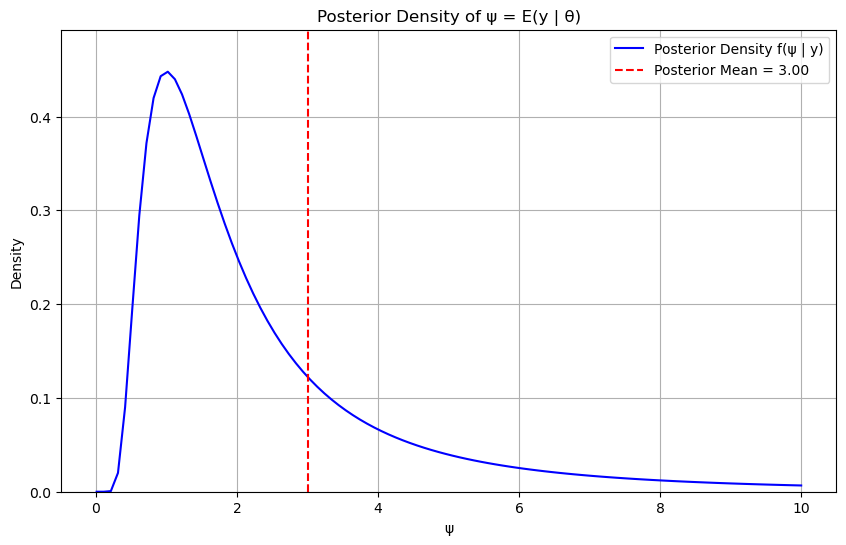

Posterior Mean E(ψ | y) = 3.00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Given data
y = 2  # Example data point; you can change this value to see how it affects the results

# Parameters for the posterior distribution
alpha = 2  # Shape parameter for the Gamma distribution
beta = y + 1  # Rate parameter for the Gamma distribution

# Define the posterior density function for psi
def posterior_density(psi):
    return (beta**2) / (psi**3) * np.exp(-beta / psi)

# Calculate the posterior mean
posterior_mean = beta  # Since E(psi | y) = y + 1

# Create an array of psi values for plotting
psi_values = np.linspace(0.01, 10, 100)  # Avoid zero to prevent division by zero
posterior_values = posterior_density(psi_values)

# Plotting the posterior density
plt.figure(figsize=(10, 6))
plt.plot(psi_values, posterior_values, label='Posterior Density f(ψ | y)', color='blue')
plt.axvline(posterior_mean, color='red', linestyle='--', label=f'Posterior Mean = {posterior_mean:.2f}')
plt.title('Posterior Density of ψ = E(y | θ)')
plt.xlabel('ψ')
plt.ylabel('Density')
plt.ylim(0, np.max(posterior_values) * 1.1)
plt.legend()
plt.grid()
plt.show()

# Output the posterior mean
print(f'Posterior Mean E(ψ | y) = {posterior_mean:.2f}')


## Exercise 5 Inference on a function of the binomial parameter

Recall the binomial-beta model given by:
$$
(y | \theta) \sim \text{Binomial}(n, \theta) \quad \text{and} \quad \theta \sim \text{Beta}(\alpha, \beta)
$$
for which:
$$
(\theta | y) \sim \text{Beta}(\alpha + y, \beta + n - y).
$$
Find the posterior mean, density function, and distribution function of 
$$
\psi = \theta^2 
$$
in the case where $n = 5$, $y = 5$, and $\alpha = \beta = 1$.

**Note**: In the context where we toss a bent coin five times and get heads every time (and the prior on the probability of heads is standard uniform), the quantity $\psi$ may be interpreted as the probability of the next two tosses both coming up heads, or equivalently, as the proportion of times heads will come up twice if the coin is repeatedly tossed in groups of two tosses a hypothetically infinite number of times.

### Solution to Exercise 5
Here, 
$$
(\theta | y) \sim \text{Beta}(1 + 5, 1 + 5 - 5) \sim \text{Beta}(6, 1)
$$
with pdf:
$$
f(\theta | y) = 6\theta^5, \quad 0 < \theta < 1.
$$

Now, since $\theta = \sqrt{\psi}$, by the transformation method, the posterior density function of $\psi$ is given by:
$$
\frac{d\theta}{d\psi} = \frac{1}{2\sqrt{\psi}},
$$
thus:
$$
f(\psi | y) = f(\theta | y) \cdot \left| \frac{d\theta}{d\psi} \right| = 6\left(\sqrt{\psi}\right)^5 \cdot \frac{1}{2\sqrt{\psi}} = 3\psi^2, \quad 0 < \psi < 1.
$$

It follows that the posterior mean of $\psi$ is:
$$
\hat{\psi} = E(\psi | y) = \int_0^1 \psi \cdot (3\psi^2) d\psi = 0.75.
$$

The posterior distribution function of $\psi$ is:
$$
F(\psi | y) = \int_0^\psi f(\psi = t | y) dt = \int_0^\psi 3t^2 dt = \psi^3, \quad 0 < \psi < 1.
$$

**Note 1**: The posterior mean of $\psi = \theta^2$ can also be obtained by:
$$
\hat{\psi} = E(\theta^2 | y) = \int_0^1 \theta^2 (6\theta^5) d\theta = 0.75,
$$
or 
$$
\hat{\psi} = E(\theta | y) = V(\theta | y) + \{E(\theta | y)\}^2 = \frac{6}{6 + 1} \cdot \frac{6 + 1}{6 + 1 + 1} = 0.75.
$$
Thus, 
$$
(\psi | y) \sim \text{Beta}(3, 1) \implies \hat{\psi} = \frac{3}{3 + 1} = 0.75.
$$

**Note 2**: The distribution function of $\psi = \theta^2$ can also be obtained by writing:
$$
F(\psi = v | y) = P(\psi \leq v | y) = P(\theta^2 \leq v | y) = P(\theta \leq v^{1/2} | y) = F(\theta = v^{1/2} | y) = \left[\theta^6\right]_{\theta = v^{1/2}} = v^3, \quad 0 < v < 1.
$$

**Note 3**: In the above, $f(\psi = t | y)$ denotes the pdf of $\psi$ given $y$, but evaluated at $t$. This pdf could also be written as $f_\psi(t | y)$ or as $\left[f(\psi | y)\right]_{\psi = t}$. Likewise, $F(\psi = v | y) \equiv F_\psi(v | y) \equiv \left[F(\psi | y)\right]_{\psi = v}$.


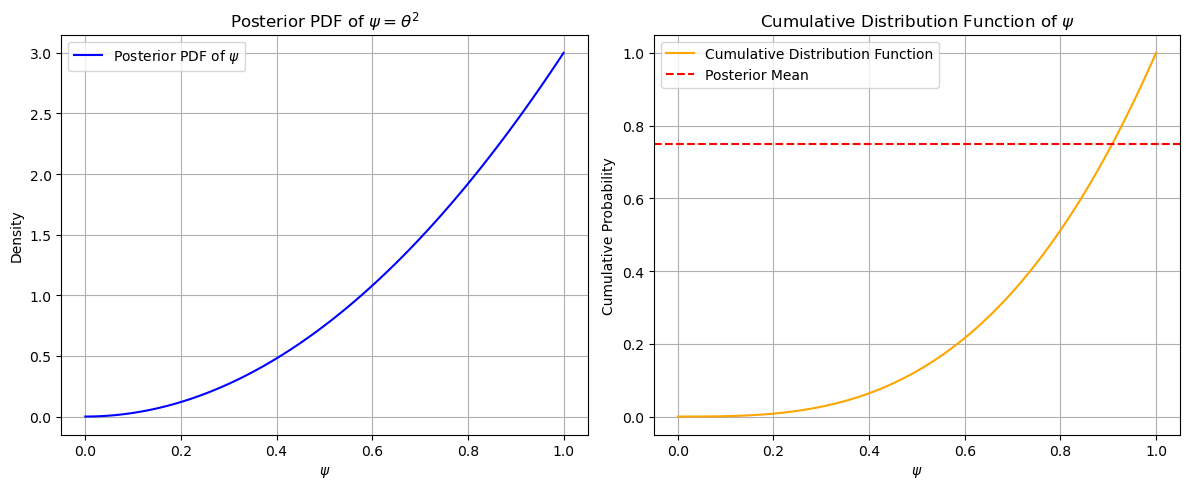

Posterior Mean of ψ: 0.7500


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Parameters
n = 5  # number of trials
y = 5  # number of successes
alpha = 1
beta = 1

# Posterior parameters for theta | y
a = alpha + y
b = beta + n - y

# Posterior PDF of theta
def pdf_theta(theta):
    return a * theta**(a - 1) * (1 - theta)**(b - 1)

# Posterior PDF of psi
def pdf_psi(psi):
    return 3 * psi**2  # since ψ = θ^2

# Calculate posterior mean of psi
def mean_psi():
    return quad(lambda psi: psi * pdf_psi(psi), 0, 1)[0]

# Calculate cumulative distribution function (CDF) of psi
def cdf_psi(psi):
    return quad(pdf_psi, 0, psi)[0]

# Generate values for psi
psi_values = np.linspace(0, 1, 100)
pdf_values = pdf_psi(psi_values)
cdf_values = [cdf_psi(p) for p in psi_values]

# Calculate the posterior mean
posterior_mean = mean_psi()

# Plotting the results
plt.figure(figsize=(12, 5))

# PDF plot
plt.subplot(1, 2, 1)
plt.plot(psi_values, pdf_values, label='Posterior PDF of $\psi$', color='blue')
plt.title('Posterior PDF of $\psi = \\theta^2$')
plt.xlabel('$\\psi$')
plt.ylabel('Density')
plt.grid()
plt.legend()

# CDF plot
plt.subplot(1, 2, 2)
plt.plot(psi_values, cdf_values, label='Cumulative Distribution Function', color='orange')
plt.axhline(y=posterior_mean, color='red', linestyle='--', label='Posterior Mean')
plt.title('Cumulative Distribution Function of $\psi$')
plt.xlabel('$\\psi$')
plt.ylabel('Cumulative Probability')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

print(f"Posterior Mean of ψ: {posterior_mean:.4f}")
